In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
# Load label CSV
labels = pd.read_csv(r'C:\Users\Admin\Downloads\Road Signs classification dataset-20250325T111147Z-001\Road Signs classification dataset\labels.csv')

import os

# Use raw string literals to handle backslashes properly
image_dir_1 = r'C:\Users\Admin\Downloads\Road Signs classification dataset-20250325T111147Z-001\Road Signs classification dataset\DATA'
image_dir_2 = r'C:\Users\Admin\Downloads\Road Signs classification dataset-20250325T111147Z-001\Road Signs classification dataset\TEST'


In [5]:
# Combine both folder paths
all_dirs = [image_dir_1, image_dir_2]

img_size = (32, 32)
images = []
labels = []

for base_dir in all_dirs:
    for label_folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, label_folder)
        if os.path.isdir(folder_path):
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                try:
                    img = load_img(img_path, target_size=img_size)
                    img = img_to_array(img) / 255.0
                    images.append(img)
                    labels.append(int(label_folder))  # folder name is the class
                except Exception as e:
                    print(f"Failed to load image: {img_path} due to {e}")

# Convert to numpy arrays
images = np.array(images)
labels = to_categorical(labels)

print(f"Loaded {len(images)} images.")

Loaded 1028 images.


In [6]:
## Test and Train split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 822, Testing samples: 206


In [8]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras import Input

model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.0546 - loss: 3.4086 - val_accuracy: 0.0874 - val_loss: 3.3422
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.1054 - loss: 3.2942 - val_accuracy: 0.1408 - val_loss: 3.0964
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.1551 - loss: 3.0339 - val_accuracy: 0.4029 - val_loss: 2.7352
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.2917 - loss: 2.6265 - val_accuracy: 0.5922 - val_loss: 2.0895
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.4339 - loss: 2.1347 - val_accuracy: 0.6650 - val_loss: 1.5272
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.5695 - loss: 1.7010 - val_accuracy: 0.8058 - val_loss: 1.0150
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.6324 - loss: 1.4020 - val_accuracy: 0.8641 - val_loss: 0.7400
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.7314 - loss: 1.0347 - val_accuracy: 0.9

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9122 - loss: 0.4355
Test Accuracy: 0.9272
Test Loss: 0.4028


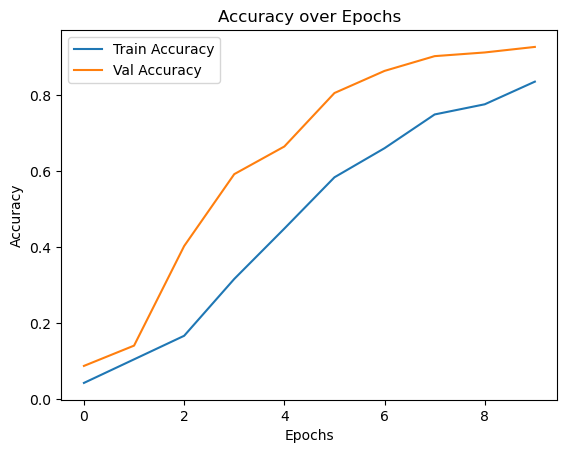

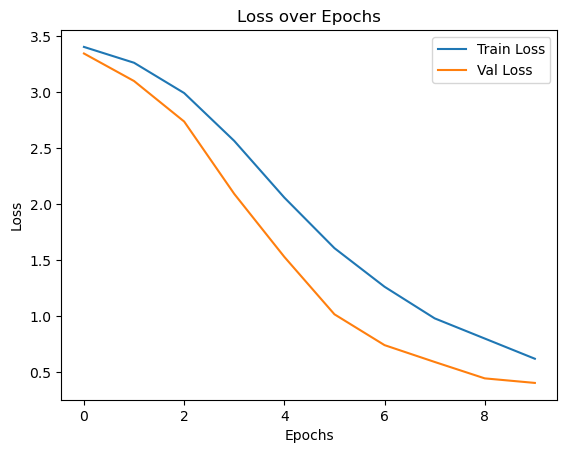

In [12]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [16]:
model.save("road_sign_classifier_model.keras")


In [17]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. Load the saved model
model = load_model('road_sign_classifier_model.keras')  # or .h5 if you saved it that way


In [27]:
# 2. Load and preprocess the image
img_path = r"C:\Users\Admin\Downloads\Road Signs classification dataset-20250325T111147Z-001\Road Signs classification dataset\TEST\13\013_1_0025_1_j.png"  # path to your test image
img = image.load_img(img_path, target_size=(32, 32))  # same size used during training


In [29]:
# 3. Convert image to array and normalize
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # normalize
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

In [30]:
# 4. Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Predicted class: 13


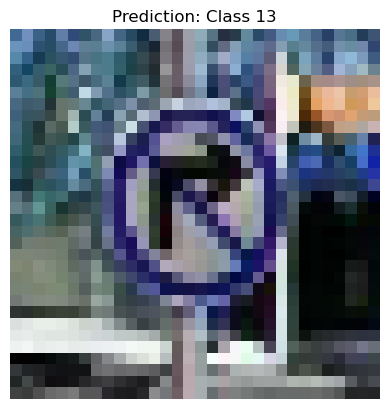

In [31]:
# 5. Show result
print(f"Predicted class: {predicted_class}")
plt.imshow(img)
plt.title(f"Prediction: Class {predicted_class}")
plt.axis('off')
plt.show()

In [32]:
label_map = {
    0: "Speed limit (5km/h)",
    1: "Speed limit (15km/h)",
    2: "Speed limit (30km/h)",
    3: "Speed limit (40km/h)",
    4: "Speed limit (50km/h)",
    5: "Speed limit (60km/h)",
    6: "Speed limit (70km/h)",
    7: "Speed limit (80km/h)",
    8: "Don't go straight or left",
    9: "Unknown7",
    10: "Don't go straight",
    11: "Don't go left",
    12: "Don't go left or right",
    13: "Don't go right",
    14: "Don't overtake from left",
    15: "No U-turn",
    16: "No car",
    17: "No horn",
    18: "No entry",
    19: "No stopping",
    20: "Go straight or right",
    21: "Go straight",
    22: "Go left",
    23: "Go left or right",
    24: "Go right"
}
print(f"Prediction: {label_map[predicted_class]}")


Prediction: Don't go right


In [19]:
# import tensorflow as tf

In [20]:
# tf.constant(0x80000000, dtype=tf.int32)


<tf.Tensor: shape=(), dtype=int32, numpy=-2147483648>

In [2]:
from keras.models import load_model

# Load the saved model
model = load_model("road_sign_classifier_model.keras")  # or .h5 if that's what you used

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [17]:
from flask import Flask, render_template, request
import os

app = Flask(__name__)

In [18]:
from keras.preprocessing import image
import numpy as np

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        img_file = request.files['image']
        if img_file:
            path = os.path.join("static", img_file.filename)
            img_file.save(path)

            # Load & preprocess the image
            img = image.load_img(path, target_size=(32, 32))  # Resize to match model input
            img_array = image.img_to_array(img) / 255.0       # Normalize
            img_array = np.expand_dims(img_array, axis=0)     # Add batch dimension

            # Make prediction
            predictions = model.predict(img_array)
            predicted_class = np.argmax(predictions)

            # Optional: map class to label name
            label_map = {
                0: "Speed Limit 20",
                1: "Speed Limit 30",
                2: "Stop",
                # add all class mappings here
            }
            result = label_map.get(predicted_class, "Unknown")

            return render_template('index.html', prediction=result, img_path=path)

    return render_template('index.html', prediction=None)


In [19]:
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3557: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
